In [1]:
################################################################################################
#  RUT-SOM-DATA-PT-06-2020-U-C                                                    Douglas High #
#   Machine-Learning-Challenge                                                November 7, 2020 #
#         > model0_compare.ipynb                                                               #
#                                                                                              #
#  > Part1: 00.UI-Update/Install to 50-Compare-df                                              #
#     - setup (read in data, split & scale, create compare_df to list each methods score).     #
#                                                                                              #
#  > Part2: 100.00-LinearRegression-no-scale to 190-Write/Sort                                 #
#     - run 27 model variations (9 models-no scaling, standard(ss) and minmax(mm)).            #
#     - append their train, test, and avg score to compare_df.                                 #
#     - save df to csv, sort and display to see best performing models.                        #
#                                                                                              #
#  > Part3: 200-DecisionTree(ss)features to 220-RandomForest(00)feature                        #
#     - list and plot feature importance for top three performing variations.                  #
#                                                                                              #
#  > Part4: 300-DecisionTree(ss)feature-selection to 320-RandomForest(00)-feature-selection.   #
#     - feature selections. remove features of top 3 performers based on Part3 results.        #
#     - resplit & rescale data. compare train/test/avg scores with full features models.       #
#                                                                                              #
#  > Part5: 400-ModelParameters  to 460-RandomForest-GridResult                                #  
#     - classifiers of the top three models are plotted and sorted in a df and displayed.      #
#     - GridSearch is done for each of the three to find best variation of each model.         #
#     - best parameters and classification report printed for each along with a comparison     #
#       of each one's original test score, after features removed, and after hypertuned.       #
################################################################################################

In [2]:
#############################################################################
#00.UI     Update/Install                                                   #
#    a- install/check for update sklearn (to prevent version mismatches).   #
#    b- install joblib - used to save model (uncomment to install).         #
#       *** Restart Kernal after joblib install ***                         #
#############################################################################

#a
!pip install sklearn --upgrade

#b
# !pip install joblib

In [3]:
###########################
#00   I/O                 #
#   - import libraries.   #
#   - associate file.     #
###########################

import pandas as pd
from matplotlib import pyplot
import warnings; warnings.simplefilter('ignore')

data_in = "../data_in/exoplanet_data.csv"

In [4]:
##############################################################################
#10     Read and remove                                                      #
#   - read data into df.                                                     #
#   - drop null columns if all values are null.                              #
#   - drop null rows.                                                        #
#   - keep only records with a known value (confirmed or false positive).    #
##############################################################################

df = pd.read_csv(data_in)
df = df.dropna(axis='columns', how='all')
df = df.dropna()

known_df = df[df["koi_disposition"] != "CANDIDATE"]

In [5]:
####################################################
#20     Set Features                               #
#   a- select all columns to use as features       #
#    - disposition is the dependent variable.      #
#   b- convert disposition to two binary columns   #
#      and delete the second one.                  #
####################################################

#a
X = known_df.drop("koi_disposition", axis=1)
y = known_df["koi_disposition"]

#b
y = pd.get_dummies(y)
y = y.drop("FALSE POSITIVE", axis=1)

In [6]:
########################################################
#30     Test/train split                               #
#   - split known_df into training and testing data.   #
########################################################

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
############################################
#40     Scale                              #
#   a- create standard scaler (ss) data.   #
#   b- create minmax scaled (mm) data.     #
############################################

#a
from sklearn.preprocessing import StandardScaler
X_scaler_ss = StandardScaler().fit(X_train)
X_train_scaled_ss = X_scaler_ss.transform(X_train)
X_test_scaled_ss = X_scaler_ss.transform(X_test)

#b
from sklearn.preprocessing import  MinMaxScaler
X_scaler_mm = MinMaxScaler().fit(X_train)
X_train_scaled_mm = X_scaler_mm.transform(X_train)
X_test_scaled_mm = X_scaler_mm.transform(X_test)

In [8]:
######################################################
#50      Compare df                                  #
#   - create df to hold metrics of various models.   #
#   model = model used (ie. linearRegression).       #
#   scale code from 40-Scale above, 00 = none.       #
#   train_score = r2 score from training data.       #
#   test_score = r2 score from test data.            #
#   avg = average train/test score.                  #
######################################################

compare_df = pd.DataFrame({"model":[], "scale_code":[], "train_score":[], "test_score":[], "avg":[]})

In [9]:
#########################################
#100.00    Linear Regression no scale   #
#   a- create and fit model.            #
#   b- create and append df row.        #
#########################################

#a 
from sklearn.linear_model import LinearRegression
model_100 = LinearRegression()
model_100.fit(X_train, y_train)

#b
model = "Linear Regression"
scale = "00"
train = model_100.score(X_train, y_train)
test = model_100.score(X_test, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [10]:
#########################################
#100.ss    Linear Regression ss scale   #
#   a- create and fit model.            #
#   b- create and append df row.        #
#########################################

#a 
model_100S = LinearRegression()
model_100S.fit(X_train_scaled_ss, y_train)

#b
model = "Linear Regression"
scale = "ss"
train = model_100.score(X_train_scaled_ss, y_train)
test = model_100.score(X_test_scaled_ss, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [11]:
#########################################
#100.mm    Linear Regression mm scale   #
#   a- create and fit model.            #
#   b- create and append df row.        #
#########################################

#a 
model_100m = LinearRegression()
model_100m.fit(X_train_scaled_mm, y_train)

#b
model = "Linear Regression"
scale = "mm"
train = model_100m.score(X_train_scaled_mm, y_train)
test = model_100m.score(X_test_scaled_mm, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [12]:
####################################
#110.00    Lasso no scale          #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
from sklearn.linear_model import Lasso
lasso_110 = Lasso(alpha=.01).fit(X_train, y_train)

#b
model = "Lasso"
scale = "00"
train = lasso_110.score(X_train, y_train)
test = lasso_110.score(X_test, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [13]:
####################################
#110.ss    Lasso ss scale          #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
lasso_110s = Lasso(alpha=.01).fit(X_train_scaled_ss, y_train)

#b
model = "Lasso"
scale = "ss"
train = lasso_110s.score(X_train_scaled_ss, y_train)
test = lasso_110s.score(X_test_scaled_ss, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [14]:
####################################
#110.mm    Lasso mm scale          #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
lasso_110m = Lasso(alpha=.01).fit(X_train_scaled_mm, y_train)

#b
model = "Lasso"
scale = "mm"
train = lasso_110m.score(X_train_scaled_mm, y_train)
test = lasso_110m.score(X_test_scaled_mm, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [15]:
####################################
#120.00    Ridge no scale          #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
from sklearn.linear_model import Ridge
ridge_120 = Ridge(alpha=.01).fit(X_train, y_train)

#b
model = "Ridge"
scale = "00"
train = ridge_120.score(X_train, y_train)
test = ridge_120.score(X_test, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [16]:
####################################
#120.00    Ridge ss scale          #
#   a- create and fit model        #
#   b- create and append df row.   #
####################################

#a 
ridge_120s = Ridge(alpha=.01).fit(X_train_scaled_ss, y_train)

#b
model = "Ridge"
scale = "ss"
train = ridge_120s.score(X_train_scaled_ss, y_train)
test = ridge_120s.score(X_test_scaled_ss, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [17]:
####################################
#120.00    Ridge mm scale          #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
ridge_120m = Ridge(alpha=.01).fit(X_train_scaled_mm, y_train)

#b
model = "Ridge"
scale = "mm"
train = ridge_120m.score(X_train_scaled_mm, y_train)
test = ridge_120m.score(X_test_scaled_mm, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [18]:
####################################
#130.00    ElasticNet no scale     #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
from sklearn.linear_model import ElasticNet
elasticnet_130 = ElasticNet(alpha=.01).fit(X_train, y_train)

#b
model = "ElasticNet"
scale = "00"
train = elasticnet_130.score(X_train, y_train)
test = elasticnet_130.score(X_test, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [19]:
####################################
#130.ss    ElasticNet ss scale     #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
elasticnet_130s = ElasticNet(alpha=.01).fit(X_train_scaled_ss, y_train)

#b
model = "ElasticNet"
scale = "ss"
train = elasticnet_130s.score(X_train_scaled_ss, y_train)
test = elasticnet_130s.score(X_test_scaled_ss, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [20]:
####################################
#130.mm    ElasticNet mm scale     #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
elasticnet_130m = ElasticNet(alpha=.01).fit(X_train_scaled_mm, y_train)

#b
model = "ElasticNet"
scale = "mm"
train = elasticnet_130m.score(X_train_scaled_mm, y_train)
test = elasticnet_130m.score(X_test_scaled_mm, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [21]:
##########################################
#140.00    LogisticRegression no scale   #
#   a- create and fit model.             #
#   b- create and append df row.         #
##########################################

#a 
from sklearn.linear_model import LogisticRegression
classifier_140 = LogisticRegression()
classifier_140.fit(X_train, y_train)

#b
model = "LogisticRegression"
scale = "00"
train = classifier_140.score(X_train, y_train)
test = classifier_140.score(X_test, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [22]:
##########################################
#140.ss    LogisticRegression ss scale   #
#   a- create and fit model.             #
#   b- create and append df row.         #
##########################################

#a 
classifier_140s = LogisticRegression()
classifier_140s.fit(X_train_scaled_ss, y_train)

#b
model = "LogisticRegression"
scale = "ss"
train = classifier_140s.score(X_train_scaled_ss, y_train)
test = classifier_140s.score(X_test_scaled_ss, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [23]:
##########################################
#140.mm    LogisticRegression mm scale   #
#   a- create and fit model.             #
#   b- create and append df row.         #
##########################################

#a 
classifier_140m = LogisticRegression()
classifier_140m.fit(X_train_scaled_mm, y_train)

#b
model = "LogisticRegression"
scale = "mm"
train = classifier_140m.score(X_train_scaled_mm, y_train)
test = classifier_140m.score(X_test_scaled_mm, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [24]:
####################################
#150.00    DecisionTree no scale   #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
from sklearn import tree
clf_150 = tree.DecisionTreeClassifier()
clf_150 = clf_150.fit(X_train, y_train)

#b
model = "DecisionTree"
scale = "00"
train = clf_150.score(X_train, y_train)
test = clf_150.score(X_test, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [25]:
####################################
#150.ss    DecisionTree ss scale   #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
clf_150s = tree.DecisionTreeClassifier()
clf_150s = clf_150s.fit(X_train_scaled_ss, y_train)

#b
model = "DecisionTree"
scale = "ss"
train = clf_150s.score(X_train_scaled_ss, y_train)
test = clf_150s.score(X_test_scaled_ss, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [26]:
####################################
#150.mm    DecisionTree mm scale   #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
clf_150m = tree.DecisionTreeClassifier()
clf_150m = clf_150m.fit(X_train_scaled_mm, y_train)

#b
model = "DecisionTree"
scale = "mm"
train = clf_150m.score(X_train_scaled_mm, y_train)
test = clf_150m.score(X_test_scaled_mm, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [27]:
####################################
#160.00    RandomForest no scale   #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
from sklearn.ensemble import RandomForestClassifier
rf_160 = RandomForestClassifier(n_estimators=200)
rf_160 = rf_160.fit(X_train, y_train)

#b
model = "RandomForest"
scale = "00"
train = rf_160.score(X_train, y_train)
test = rf_160.score(X_test, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [28]:
####################################
#160.ss    RandomForest ss scale   #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
rf_160s = RandomForestClassifier(n_estimators=200)
rf_160s = rf_160s.fit(X_train_scaled_ss, y_train)

#b
model = "RandomForest"
scale = "ss"
train = rf_160s.score(X_train_scaled_ss, y_train)
test = rf_160s.score(X_test_scaled_ss, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [29]:
####################################
#160.mm    RandomForest mm scale   #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
rf_160m = RandomForestClassifier(n_estimators=200)
rf_160m = rf_160m.fit(X_train_scaled_mm, y_train)

#b
model = "RandomForest"
scale = "mm"
train = rf_160m.score(X_train_scaled_mm, y_train)
test = rf_160m.score(X_test_scaled_mm, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [30]:
##################################################################
#170.00    KNN no scale                                          #
#   a- create and fit model.                                     #
#   b- create and append df row.                                 #
#    - using neighbors = 33 as that is where test/train cross.   #
##################################################################

#a 
from sklearn.neighbors import KNeighborsClassifier
knn_170 = KNeighborsClassifier(n_neighbors=33)
knn_170.fit(X_train, y_train)

#b
model = "KNN"
scale = "00"
train = knn_170.score(X_train, y_train)
test = knn_170.score(X_test, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [31]:
####################################
#170.ss    KNN ss scale            #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
knn_170s = KNeighborsClassifier(n_neighbors=33)
knn_170s.fit(X_train_scaled_ss, y_train)

#b
model = "KNN"
scale = "ss"
train = knn_170s.score(X_train_scaled_ss, y_train)
test = knn_170s.score(X_test_scaled_ss, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [32]:
####################################
#170.mm    KNN mm scale            #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
knn_170m = KNeighborsClassifier(n_neighbors=33)
knn_170m.fit(X_train_scaled_mm, y_train)

#b
model = "KNN"
scale = "mm"
train = knn_170m.score(X_train_scaled_mm, y_train)
test = knn_170m.score(X_test_scaled_mm, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [33]:
################################################
#180.00   SVC no scale                         #
#   a- create and fit model.                   #
#   b- create and append df row.               #
#   ** this routine takes ~15 minutes to run   #
#       and returns the following row...       #
#  SVC	00	0.957014	0.950226	0.953620   #
################################################

# #a 
# from sklearn.svm import SVC 
# model_180 = SVC(kernel='linear')
# model_180.fit(X_train, y_train)

# #b
# model = "SVC"
# scale = "00"
# train = model_180.score(X_train, y_train)
# test = model_180.score(X_test, y_test)
# avg = (train+test)/2
# row = [model, scale, train, test, avg]
# compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [34]:
####################################
#180.ss    SVC ss scale            #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
from sklearn.svm import SVC 
model_180s = SVC(kernel='linear')
model_180s.fit(X_train_scaled_ss, y_train)

#b
model = "SVC"
scale = "ss"
train = model_180s.score(X_train_scaled_ss, y_train)
test = model_180s.score(X_test_scaled_ss, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [35]:
####################################
#180.mm    SVC mm scale            #
#   a- create and fit model.       #
#   b- create and append df row.   #
####################################

#a 
model_180m = SVC(kernel='linear')
model_180m.fit(X_train_scaled_mm, y_train)

#b
model = "SVC"
scale = "mm"
train = model_180m.score(X_train_scaled_mm, y_train)
test = model_180m.score(X_test_scaled_mm, y_test)
avg = (train+test)/2
row = [model, scale, train, test, avg]
compare_df = compare_df.append(pd.DataFrame([row], columns=compare_df.columns))

In [36]:
#################################################
#190     Write/Sort                             #
#   - write compare_df to csv.                  #
#   - sort df based on avg score and display.   #
#################################################

compare_df.to_csv("../data_out/methods_compare.csv", index=False, header=True)

compare_df.sort_values(["avg"], ascending = False, inplace=True)  
compare_df

,model,scale_code,train_score,test_score,avg
0,DecisionTree,00,1.000000,0.985671,0.992836
0,DecisionTree,ss,1.000000,0.984917,0.992459
0,DecisionTree,mm,1.000000,0.983409,0.991704
0,RandomForest,mm,1.000000,0.979638,0.989819
0,RandomForest,00,1.000000,0.979638,0.989819
0,SVC,ss,0.992459,0.986425,0.989442
0,LogisticRegression,ss,0.992961,0.985671,0.989316
0,RandomForest,ss,1.000000,0.978130,0.989065
0,LogisticRegression,mm,0.991956,0.985671,0.988813
0,KNN,mm,0.991956,0.985671,0.988813


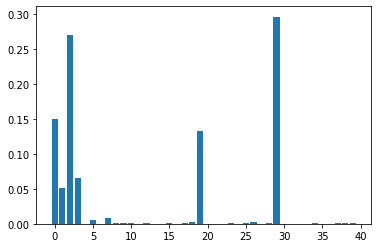

,index,score
0,35.0,0.000000
0,22.0,0.000000
0,20.0,0.000000
0,16.0,0.000000
0,36.0,0.000000
0,24.0,0.000000
0,30.0,0.000000
0,27.0,0.000000
0,32.0,0.000000
0,31.0,0.000000


In [37]:
############################################
#200     DecisionTree (ss) features        #
#   - list and plot features importance.   #
############################################

dt_feature_df = pd.DataFrame({"index":[], "score":[]})
importance = clf_150s.feature_importances_
 
for i,v in enumerate(importance):
    dt_feature_df = dt_feature_df.append(pd.DataFrame([[i,v]], columns=dt_feature_df.columns))
    
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

dt_feature_df.sort_values(["score"], inplace=True)  
dt_feature_df

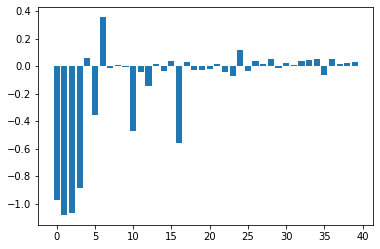

,index,score
0,1.0,-1.081003
0,2.0,-1.065863
0,0.0,-0.971763
0,3.0,-0.886954
0,16.0,-0.558608
0,10.0,-0.470535
0,5.0,-0.354462
0,12.0,-0.142224
0,23.0,-0.073417
0,35.0,-0.064821


In [38]:
############################################
#210     SVC (ss) features                 #
#   - list and plot features importance.   #
############################################

svc_feature_df = pd.DataFrame({"index":[], "score":[]})
importance = model_180s.coef_[0]
 
for i,v in enumerate(importance):
    svc_feature_df = svc_feature_df.append(pd.DataFrame([[i,v]], columns=svc_feature_df.columns))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

svc_feature_df.sort_values(["score"], inplace=True)  
svc_feature_df

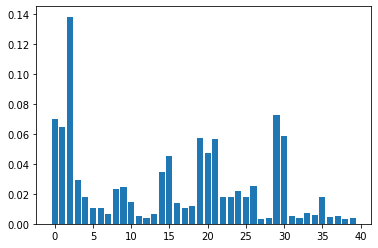

,index,score
0,27.0,0.002926
0,38.0,0.003471
0,12.0,0.003680
0,32.0,0.003773
0,39.0,0.003848
0,28.0,0.003935
0,36.0,0.004540
0,37.0,0.004999
0,31.0,0.005301
0,11.0,0.005406


In [39]:
############################################
#220     RandomForest (00) features        #
#   - list and plot features importance.   #
############################################

rf_feature_df = pd.DataFrame({"index":[], "score":[]})
importance = rf_160.feature_importances_
 
for i,v in enumerate(importance):
    rf_feature_df = rf_feature_df.append(pd.DataFrame([[i,v]], columns=rf_feature_df.columns))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

rf_feature_df.sort_values(["score"], inplace=True)  
rf_feature_df

In [40]:
############################################################################
#300   DecisionTree(ss) feature selection                                  #
#   a- remove columns with a score of 0.                                   #
#   b- split new df and scale.                                             #
#   c- run model on new data.                                              #
#   d- recalculate original scores then new scores and print comparison.   #
#   note- varying effect on score, generally better, use new model.        #
############################################################################

#a
cols = [39,33,32,31,30,36,27,25,22,34,16,17,35,10,9]
dt_df = X.drop(X.columns[cols],axis=1)

#b
dt_df_train, dt_df_test, y_train, y_test = train_test_split(dt_df, y, random_state=42)

dt_df_scaler_ss = StandardScaler().fit(dt_df_train)
dt_df_train_scaled_ss = dt_df_scaler_ss.transform(dt_df_train)
dt_df_test_scaled_ss = dt_df_scaler_ss.transform(dt_df_test)

#c
clf_150sXXX = tree.DecisionTreeClassifier()
clf_150sXXX = clf_150sXXX.fit(dt_df_train_scaled_ss, y_train)
predictions_150sXXX = clf_150sXXX.predict(dt_df_test_scaled_ss)

#d
# original scores
train = clf_150s.score(X_train_scaled_ss, y_train)
test = clf_150s.score(X_test_scaled_ss, y_test)
avg = (train+test)/2

# new scores
trainXXX = clf_150sXXX.score(dt_df_train_scaled_ss, y_train)
testXXX = clf_150sXXX.score(dt_df_test_scaled_ss, y_test)
avgXXX = (trainXXX+testXXX)/2

# compare scores
print(f"train:  {train} test:  {test}  avg:  {avg}")
print(f"trainX: {trainXXX} testX: {testXXX}  avgx: {avgXXX}")

train:  1.0 test:  0.9849170437405732  avg:  0.9924585218702866
trainX: 1.0 testX: 0.9841628959276018  avgx: 0.9920814479638009


In [41]:
############################################################################
#310   SVC(ss) feature selection                                           #
#   a- remove columns with a negative score.                               #
#   b- split new df and scale.                                             #
#   c- run model on new data.                                              #
#   d- recalculate original scores then new scores and print comparison.   #
#   note- significant reduction in score (see routine 311 below).          #
############################################################################

#a
cols = [1,2,0,3,16,10,5,12,23,35,11,22,25,14,18,19,20,7,29,9]
svc_df = X.drop(X.columns[cols],axis=1)

#b
svc_df_train, svc_df_test, y_train, y_test = train_test_split(svc_df, y, random_state=42)

svc_df_scaler_ss = StandardScaler().fit(svc_df_train)
svc_df_train_scaled_ss = svc_df_scaler_ss.transform(svc_df_train)
svc_df_test_scaled_ss = svc_df_scaler_ss.transform(svc_df_test)

#c
model_180sXXX = SVC(kernel='linear')
model_180sXXX.fit(svc_df_train_scaled_ss, y_train)
predictions_180sXXX = model_180sXXX.predict(svc_df_train_scaled_ss)

#d
# original scores
train = model_180s.score(X_train_scaled_ss, y_train)
test = model_180s.score(X_test_scaled_ss, y_test)
avg = (train+test)/2

#  new scores
trainXXX = model_180sXXX.score(svc_df_train_scaled_ss, y_train)
testXXX = model_180sXXX.score(svc_df_test_scaled_ss, y_test)
avgXXX = (trainXXX+testXXX)/2

# compare scores
print(f"train:  {train} test:  {test}  avg:  {avg}")
print(f"trainX: {trainXXX} testX: {testXXX}  avgx: {avgXXX}")

train:  0.9924585218702866 test:  0.9864253393665159  avg:  0.9894419306184012
trainX: 0.8582202111613876 testX: 0.8408748114630468  avgx: 0.8495475113122172


In [42]:
###############################################################################
#311   SVC(ss) feature selection Part2                                        #
#   - removing features from being dropped.                                   #
#     - cols 5,9,23 had no affect, kept them dropped.                         #
#     - cols 7,12,20,29 lowered score when not dropped, kept dropped.         #
#     - cols 19,18,14,25,22,11,35,10,16,3,0,1,2 lowered score when dropped.   #
#     - one by one removed features with lt 3% importance.                    #
#      - 8,31,27,13,21,37,38 had no affect, kept them as dropped.             #
#      - 30 & 39 lowered score.                                               #
#   conclusion - removing features has a negative or no affect in scores,     #
#                use new model with irrelevant features removed.              #
###############################################################################

#a
cols = [12,20,7,9,29,5,23,8,31,27,13,21,37]
svc_df = X.drop(X.columns[cols],axis=1)

#b
svc_df_train, svc_df_test, y_train, y_test = train_test_split(svc_df, y, random_state=42)
svc_df_scaler_ss = StandardScaler().fit(svc_df_train)
svc_df_train_scaled_ss = svc_df_scaler_ss.transform(svc_df_train)
svc_df_test_scaled_ss = svc_df_scaler_ss.transform(svc_df_test)

#c
model_180sXXX = SVC(kernel='linear')
model_180sXXX.fit(svc_df_train_scaled_ss, y_train)
predictions_180sXXX = model_180sXXX.predict(svc_df_train_scaled_ss)

#d
# original scores
train = model_180s.score(X_train_scaled_ss, y_train)
test = model_180s.score(X_test_scaled_ss, y_test)
avg = (train+test)/2

#  new scores
trainXXX = model_180sXXX.score(svc_df_train_scaled_ss, y_train)
testXXX = model_180sXXX.score(svc_df_test_scaled_ss, y_test)
avgXXX = (trainXXX+testXXX)/2

# compare scores
print(f"train:  {train} test:  {test}  avg:  {avg}")
print(f"trainX: {trainXXX} testX: {testXXX}  avgx: {avgXXX}")

train:  0.9924585218702866 test:  0.9864253393665159  avg:  0.9894419306184012
trainX: 0.9924585218702866 testX: 0.9864253393665159  avgx: 0.9894419306184012


In [43]:
#########################################################################################
#320   RandomForest (00) feature selection                                              #
#   a- remove columns with score lt 1%.                                                 #
#   b- split new df.                                                                    #
#   c- run model on new data.                                                           #
#   d- recalculate original scores then new scores and print comparison.                #
#   note- varying results some with a slight increase in score, some slight decrease.   #
#  conclusion - use new model (if nothing else, less overhead).                         #
#########################################################################################

#a
cols = [27,38,12,28,32,36,37,39,31,11,34,7,13,17,5]
rf_df = X.drop(X.columns[cols],axis=1)

#b
rf_df_train, rf_df_test, y_train, y_test = train_test_split(rf_df, y, random_state=42)

#c
rf_160XXX = RandomForestClassifier(n_estimators=200)
rf_160XXX = rf_160XXX.fit(rf_df_train, y_train)
predictions_160XXX = rf_160XXX.predict(rf_df_test)

#d
# original scores
train = rf_160.score(X_train, y_train)
test = rf_160.score(X_test, y_test)
avg = (train+test)/2

#  new scores
trainXXX = rf_160XXX.score(rf_df_train, y_train)
testXXX = rf_160XXX.score(rf_df_test, y_test)
avgXXX = (trainXXX+testXXX)/2

# compare scores
print(f"train:  {train} test:  {test}  avg:  {avg}")
print(f"trainX: {trainXXX} testX: {testXXX}  avgx: {avgXXX}")

train:  1.0 test:  0.9796380090497737  avg:  0.9898190045248869
trainX: 1.0 testX: 0.9811463046757164  avgx: 0.9905731523378583


In [44]:
##############################################
#400    ModelParameters                      #
#   - print off parameters of top3 models.   #
##############################################

print(clf_150s)
print("-" * 100)
print(model_180s)
print("-" * 100)
print(rf_160)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
----------------------------------------------------------------------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
----------------------------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_

In [45]:
###############################################
#410   DecisionTree GridSearch                #
#   - run gridsearch on various parameters.   #
###############################################

from sklearn.model_selection import GridSearchCV
param_grid = {"splitter": ["random", "best"],
              "max_features": ["auto", "sqrt", "log2", int, float, None],
              "ccp_alpha":[0, 0.01, 0.1, 1]}
dt_grid = GridSearchCV(clf_150s, param_grid, verbose=0)
dt_grid.fit(dt_df_train_scaled_ss, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ccp_alpha': [0, 0.01, 0.1, 1],
                  

In [46]:
###########################################################
#420   DecisionTree GridResult                            #
#   - print best params and score.                        # 
#   - make predictions and print classification report.   #
#   - print comparison of test scores.                    #
###########################################################

print(dt_grid.best_params_)
print(dt_grid.best_score_)
predictions_420 = dt_grid.predict(dt_df_test_scaled_ss)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_420,
                            target_names=["CONFIRMED", "FALSE POSITIVE"]))

print(f"original test score:    {clf_150s.score(X_test_scaled_ss, y_test)}")
print(f"dropped features score: {clf_150sXXX.score(dt_df_test_scaled_ss, y_test)}")
print(f"hypertuned test  score: {dt_grid.best_score_}")

{'ccp_alpha': 0.01, 'max_features': None, 'splitter': 'random'}
0.991957586675516
                precision    recall  f1-score   support

     CONFIRMED       0.98      1.00      0.99       875
FALSE POSITIVE       1.00      0.96      0.98       451

      accuracy                           0.99      1326
     macro avg       0.99      0.98      0.98      1326
  weighted avg       0.99      0.99      0.99      1326

original test score:    0.9849170437405732
dropped features score: 0.9841628959276018
hypertuned test  score: 0.991957586675516


In [47]:
###############################################
#430   SVC GridSearch                         #
#   - run gridsearch on various parameters.   #
###############################################

param_grid = {"C": [1, 5, 10, 50],
              "gamma": [0.0001, 0.0005, 0.001, 0.005],
              "kernel": ["linear", "poly", "rbf", "sigmoid"]}
svc_grid = GridSearchCV(model_180s, param_grid, verbose=0)
svc_grid.fit(svc_df_train_scaled_ss, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
###########################################################
#440   SVC GridResult                                     #
#   - print best params and score.                        # 
#   - make predictions and print classification report.   #
#   - print comparison of test scores.                    #
###########################################################

print(svc_grid.best_params_)
print(svc_grid.best_score_)
predictions_440 = svc_grid.predict(svc_df_test_scaled_ss)

print(classification_report(y_test, predictions_440,
                            target_names=["CONFIRMED", "FALSE POSITIVE"]))

print(f"original test score:    {model_180s.score(X_test_scaled_ss, y_test)}")
print(f"dropped features score: {model_180sXXX.score(svc_df_test_scaled_ss, y_test)}")
print(f"hypertuned test  score: {svc_grid.best_score_}")

{'C': 5, 'gamma': 0.0001, 'kernel': 'linear'}
0.9922088429569229
                precision    recall  f1-score   support

     CONFIRMED       0.98      1.00      0.99       875
FALSE POSITIVE       1.00      0.96      0.98       451

      accuracy                           0.99      1326
     macro avg       0.99      0.98      0.98      1326
  weighted avg       0.99      0.99      0.99      1326

original test score:    0.9864253393665159
dropped features score: 0.9864253393665159
hypertuned test  score: 0.9922088429569229


In [49]:
###############################################
#450   RandomForest GridSearch                #
#   - run gridsearch on various parameters.   # 
###############################################

param_grid = {"n_estimators": [10, 100, 200, 500],
              "max_features": ["auto", "sqrt", "log2", int, float, None],
              "ccp_alpha": [0, 0.01, 0.1, 1, 10],
              "random_state": [int, "RandomState", None]}
rf_grid = GridSearchCV(rf_160, param_grid, verbose=0)
rf_grid.fit(rf_df_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=No...
                                              random_state=None, verbose=0,
                                   

In [50]:
###########################################################
#460   RandomForest GridResult                            #
#   - print best params and score.                        # 
#   - make predictions and print classification report.   #
#   - print comparison of test scores.                    #
###########################################################

print(rf_grid.best_params_)
print(rf_grid.best_score_)
predictions_460 = rf_grid.predict(rf_df_test)

print(classification_report(y_test, predictions_460,
                            target_names=["CONFIRMED", "FALSE POSITIVE"]))

print(f"original test score:    {rf_160.score(X_test, y_test)}")
print(f"dropped features score: {rf_160XXX.score(rf_df_test, y_test)}")
print(f"hypertuned test  score: {rf_grid.best_score_}")

{'ccp_alpha': 0, 'max_features': None, 'n_estimators': 100, 'random_state': None}
0.991453809930154
                precision    recall  f1-score   support

     CONFIRMED       0.98      1.00      0.99       875
FALSE POSITIVE       1.00      0.97      0.98       451

      accuracy                           0.99      1326
     macro avg       0.99      0.98      0.99      1326
  weighted avg       0.99      0.99      0.99      1326

original test score:    0.9796380090497737
dropped features score: 0.9811463046757164
hypertuned test  score: 0.991453809930154
